In [22]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['figure.figsize']=(5,5) #rescale figures
plt.rcParams['pdf.fonttype']=42 #for vectorized text in pdfs
sns.set_theme(style="white")


In [23]:
# load in data from Zillionis et al 2019

adata = sc.read_mtx('/srv/mfs/hausserlab/alper.eroglu/data/Zilionis2019/GSE127465_human_counts_normalized_54773x41861.mtx.gz')

# add gene names
adata.var_names = np.loadtxt('/srv/mfs/hausserlab/alper.eroglu/data/Zilionis2019/GSE127465_gene_names_human_41861.tsv.gz',dtype=str)
# add per-cell metadata
adata.obs = pd.read_csv('/srv/mfs/hausserlab/alper.eroglu/data/Zilionis2019/GSE127465_human_cell_metadata_54773x25.tsv.gz',sep='\t')

# this data contain already log1p normalized counts, we want the raw versions, so we will transform the data by reversing the normalization based on authro provided total UMIs
sc.pp.normalize_total(adata,target_sum=adata.obs['Total counts'].values)

# as this is a too large with many tissues, we will only focus on one of the tissues provided by authors
adata = adata[adata.obs['used_in_NSCLC_immune'].astype(bool).values]
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata


/tmp/ipykernel_2320703/1490242054.py:15: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
/scratch/alper.eroglu/miniconda3/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 34558 × 41861
    obs: 'Patient', 'Tissue', 'Barcoding emulsion', 'Library', 'Barcode', 'Total counts', 'Percent counts from mitochondrial genes', 'Most likely LM22 cell type', 'Major cell type', 'Minor subset', 'used_in_NSCLC_all_cells', 'x_NSCLC_all_cells', 'y_NSCLC_all_cells', 'used_in_NSCLC_and_blood_immune', 'x_NSCLC_and_blood_immune', 'y_NSCLC_and_blood_immune', 'used_in_NSCLC_immune', 'x_NSCLC_immune', 'y_NSCLC_immune', 'used_in_NSCLC_non_immune', 'x_NSCLC_non_immune', 'y_NSCLC_non_immune', 'used_in_blood', 'x_blood', 'y_blood', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [24]:
adata.obs

,Patient,Tissue,Barcoding emulsion,Library,Barcode,Total counts,Percent counts from mitochondrial genes,Most likely LM22 cell type,Major cell type,Minor subset,...,used_in_NSCLC_non_immune,x_NSCLC_non_immune,y_NSCLC_non_immune,used_in_blood,x_blood,y_blood,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
7127,p1,tumor,p1t,p1t1,bcHTNA,7516.0,3.579031,Macrophages M2,tMoMacDC,tMac2,...,False,NaN,NaN,False,NaN,NaN,2613,7516.000000,269.000000,3.579031
7129,p1,tumor,p1t,p1t1,bcHNVA,5684.0,4.574243,Macrophages M2,tMoMacDC,tMac2,...,False,NaN,NaN,False,NaN,NaN,1981,5684.000000,259.999969,4.574243
7130,p1,tumor,p1t,p1t1,bcALZN,4558.0,4.958315,Monocytes,tMoMacDC,tMono1,...,False,NaN,NaN,False,NaN,NaN,1867,4557.999023,225.999985,4.958316
7132,p1,tumor,p1t,p1t1,bcFWBP,2915.0,5.180103,Mast cells activated,tMast cells,tMast1,...,False,NaN,NaN,False,NaN,NaN,1308,2914.999512,150.999985,5.180103
7133,p1,tumor,p1t,p1t1,bcBJYE,3576.0,12.388143,Macrophages M2,tMoMacDC,tMac6,...,False,NaN,NaN,False,NaN,NaN,1548,3576.000000,443.000000,12.388143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54768,p7,tumor,p7t,p7t2,bcFAUI,550.0,18.363636,Eosinophils,tMast cells,tMast1,...,False,NaN,NaN,False,NaN,NaN,336,550.000000,101.000000,18.363636
54769,p7,tumor,p7t,p7t2,bcFHTY,549.0,5.828780,Macrophages M0,tMoMacDC,tMac1,...,False,NaN,NaN,False,NaN,NaN,367,549.000000,32.000000,5.828780
54770,p7,tumor,p7t,p7t2,bcBHQQ,429.0,6.060606,Macrophages M2,tMoMacDC,tMac3,...,False,NaN,NaN,False,NaN,NaN,295,429.000000,26.000000,6.060606
54771,p7,tumor,p7t,p7t2,bcCXIB,364.0,5.769231,Neutrophils,tMoMacDC,tMono3,...,False,NaN,NaN,False,NaN,NaN,252,364.000000,21.000000,5.769231


In [25]:
# lets pick Patient p2 from this to make our life easier
adata = adata[adata.obs["Patient"] == "p1"]

adata

View of AnnData object with n_obs × n_vars = 6522 × 41861
    obs: 'Patient', 'Tissue', 'Barcoding emulsion', 'Library', 'Barcode', 'Total counts', 'Percent counts from mitochondrial genes', 'Most likely LM22 cell type', 'Major cell type', 'Minor subset', 'used_in_NSCLC_all_cells', 'x_NSCLC_all_cells', 'y_NSCLC_all_cells', 'used_in_NSCLC_and_blood_immune', 'x_NSCLC_and_blood_immune', 'y_NSCLC_and_blood_immune', 'used_in_NSCLC_immune', 'x_NSCLC_immune', 'y_NSCLC_immune', 'used_in_NSCLC_non_immune', 'x_NSCLC_non_immune', 'y_NSCLC_non_immune', 'used_in_blood', 'x_blood', 'y_blood', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

/tmp/ipykernel_2320703/1540796624.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["log10_UMIs"] = np.log10(adata.obs["total_counts"])
/scratch/alper.eroglu/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


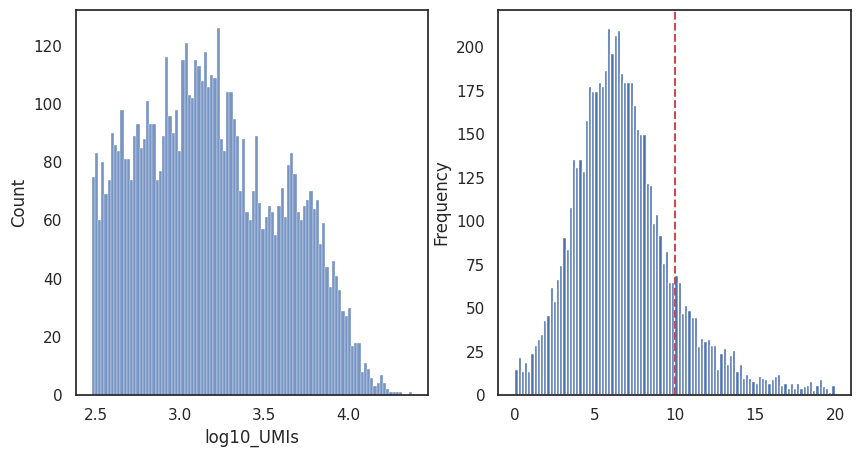

In [26]:
adata.obs["log10_UMIs"] = np.log10(adata.obs["total_counts"])
plt.rcParams['figure.figsize']=(10,5) #rescale figures

plt.subplot(1, 2, 1)
sns.histplot(adata.obs["log10_UMIs"], bins=100)

plt.subplot(1, 2, 2)
adata.obs["pct_counts_mt"].plot.hist(bins=100)
plt.axvline(x=10, color='r', linestyle='--')

In [27]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# filter out cells with more than 15% of their transciptome is from mitochondria genes
adata = adata[adata.obs["pct_counts_mt"]<15]

adata


View of AnnData object with n_obs × n_vars = 6222 × 28545
    obs: 'Patient', 'Tissue', 'Barcoding emulsion', 'Library', 'Barcode', 'Total counts', 'Percent counts from mitochondrial genes', 'Most likely LM22 cell type', 'Major cell type', 'Minor subset', 'used_in_NSCLC_all_cells', 'x_NSCLC_all_cells', 'y_NSCLC_all_cells', 'used_in_NSCLC_and_blood_immune', 'x_NSCLC_and_blood_immune', 'y_NSCLC_and_blood_immune', 'used_in_NSCLC_immune', 'x_NSCLC_immune', 'y_NSCLC_immune', 'used_in_NSCLC_non_immune', 'x_NSCLC_non_immune', 'y_NSCLC_non_immune', 'used_in_blood', 'x_blood', 'y_blood', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log10_UMIs', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [28]:
# store the suer provided cell types in a new column of .obs called cellType
adata.obs["cellType"] = adata.obs["Major cell type"]

# let's check how many cells we have for each subset
adata.obs["cellType"].value_counts()

/tmp/ipykernel_2320703/35268918.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["cellType"] = adata.obs["Major cell type"]


cellType
tMoMacDC         2539
tT cells         2054
tNeutrophils      598
tNK cells         283
tPlasma cells     257
tB cells          227
tMast cells       157
tpDC              107
Name: count, dtype: int64

In [ ]:
# to define the parameters of ASTRID easier, we'll provide the sample name
sample = "Zilionis_p1_ASTRID_Example"

# this is our pre ASTRID file that will be provided for processing
adata_file = f'/srv/mfs/hausserlab/alper.eroglu/data/Zilionis2019/{sample}.h5ad'


prefix = sample

# this is the location for the output Anndata file from ASTRID
output_file = f'/srv/mfs/hausserlab/alper.eroglu/data/Zilionis2019/{sample}_outASTRID.h5ad'

# this is the result of clustering and annotation
clustering_result = f'/srv/mfs/hausserlab/alper.eroglu/data/Zilionis2019/{sample}_ASTRID_Result.csv'

# as the authors provided their annotation, we will provide the name of that column from adata.obs
author_type = 'cellType'

# output directory for outputting the clustering and validation plots, should already be created
output_directory = "/scratch/alper.eroglu/GRINT/new_outputs/"

# we will first write this Anndata object 
adata.write_h5ad(adata_file)

# this can also be done in the terminal or with a bash file but this is a bit more convenient
# we want ASTRID to cluster, annotate and validate the cells of this sample hence the options with --

# IMPORTANT: for mouse data add this option --skip_cell_typing as there is no cell type reference for mice
# --out_dir option added to give the output directory for outputting the clustering and validation plots 
 
os.system(f'nice -19 python3 /scratch/alper.eroglu/tools/ASTRID/ASTRID_v0.01.py 
          --clustering --annotation  --validation 
          --input_file {adata_file} 
          --input_prefix {prefix} 
          --output_file {output_file} 
          --output_clustering_results {clustering_result} 
          --author_type {author_type} 
          --out_dir {output_directory}')

# in the end we will read in the data from the output 
tmp_data = sc.read_h5ad(output_file)

tmp_data


Clustering started for the sample Zilionis_p1_ASTRID_Example
Running clustering
First level of clustering done
Number of clusters: 6
Normalized mutual information between clustering_level_1 and cellType: 0.7533195415118787
Clustering done
Final clustering level: clustering_level_11
Number of clusters: 208
Normalized mutual information between clustering_level_11 and cellType: 0.9550644899599725
Clustering took 5 minutes and 4.29 seconds
Annotation started for the sample Zilionis_p1_ASTRID_Example
Running annotation


Aggregating Samples: 100%|██████████| 208/208 [00:00<00:00, 3581.98it/s]


Running SingleR ...
SingleR completed.
Annotation done
Number of SingleR_CellType found: 7
Normalized mutual information between SingleR_CellType and cellType: 0.6799860229672533
Annotation took 0 minutes and 44.75 seconds
Validation started for the sample Zilionis_p1_ASTRID_Example
clustering_level_11
Running validation
Validation done
Number of clusters that passed the formula out of the applicable/total: 101/208/208
Number of cells that passed the formula out of the applicable/total: 2191/4393/4393
Percentage of cells that passed the formula out of the applicable/total: 49.87/49.87
Validation took 2 minutes and 32.93 seconds


AnnData object with n_obs × n_vars = 4393 × 41861
    obs: 'Patient', 'Tissue', 'Barcoding emulsion', 'Library', 'Barcode', 'Total counts', 'Percent counts from mitochondrial genes', 'Most likely LM22 cell type', 'Major cell type', 'Minor subset', 'used_in_NSCLC_all_cells', 'x_NSCLC_all_cells', 'y_NSCLC_all_cells', 'used_in_NSCLC_and_blood_immune', 'x_NSCLC_and_blood_immune', 'y_NSCLC_and_blood_immune', 'used_in_NSCLC_immune', 'x_NSCLC_immune', 'y_NSCLC_immune', 'used_in_NSCLC_non_immune', 'x_NSCLC_non_immune', 'y_NSCLC_non_immune', 'used_in_blood', 'x_blood', 'y_blood', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log10_UMIs', 'cellType', 'clustering_level_1', 'clustering_level_2', 'clustering_level_3', 'clustering_level_4', 'clustering_level_5', 'clustering_level_6', 'clustering_level_7', 'clustering_level_8', 'clustering_level_9', 'clustering_level_10', 'clustering_level_11', 'final_clustering_level', 'SingleR_Pruned_CellType', 'SingleR_All_deltanext', '

/scratch/alper.eroglu/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/scratch/alper.eroglu/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/scratch/alper.eroglu/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(c

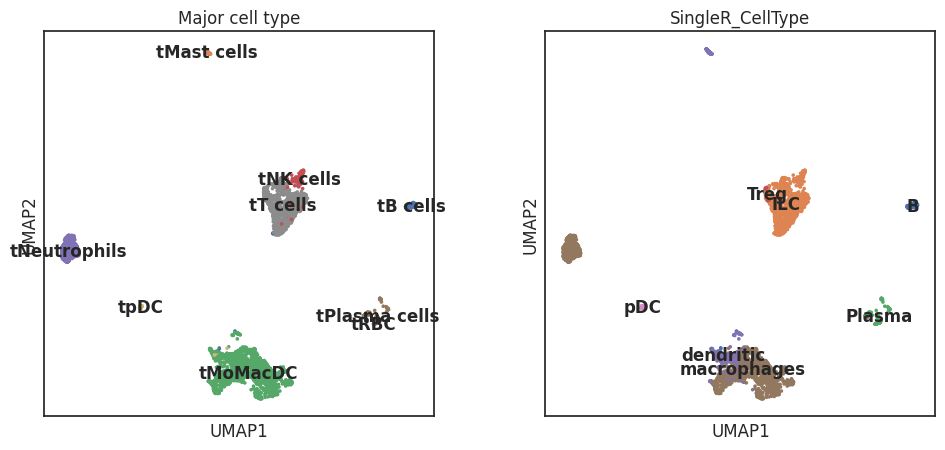

In [21]:
plt.rcParams['figure.figsize']=(5,5) #rescale figures
sc.pl.umap(tmp_data, color = ["Major cell type", "SingleR_CellType"], legend_loc="on data")

In [19]:
# let's read the output file from ASTRID
astridSummary = pd.read_csv(clustering_result)

astridSummary

,clustering_level_11,SingleR_CellType,SingleR_Pruned_CellType,CellCount,TotalDepth,MedianDepth,MedianGenes,MeanMT,paperCellTypeAbundance,cancer_percentage,cancer_percentage_no_unassigned,unassigned_percentage,FormulaPassed,OtherCellTypesPassed,OddsRatioMarkerGenes,TopOddsRatioGenes,CountCellTypesPassed
0,0_0_0_0_0_0_0_0,ILC,ILC,12,30361.000,2285.0000,1139.0,6.668123,tT cells(100.0%),0.0,0.0,0.0,False,Treg,CD3D;CD4;CTLA4;FOXP3;IL2RA;PTPRC;TIGIT,IL32;TRBC2;TRAC;DUSP4;CD3D,1
1,0_0_0_0_0_0_0_1,ILC,ILC,14,24122.000,1723.0000,904.0,5.994450,tT cells(100.0%),0.0,0.0,0.0,False,Treg,CD3D;COL1A1;CTLA4;FOXP3;IL2RA;PTPRC;TIGIT,IL32;LTB;DUSP4;TRBC2;TRAC,1
2,0_0_0_0_0_0_1,Treg,Treg,29,52226.000,1651.0002,941.0,6.645028,tT cells(100.0%),0.0,0.0,0.0,True,Treg,CD3D;CD3E;CD4;CTLA4;FOXP3;IL2RA;PTPRC;TIGIT,IL32;TRBC2;LTB;DUSP4;TRAC,1
3,0_0_0_0_0_0_2,Treg,Treg,14,24889.000,1586.0000,850.5,6.875249,tT cells(100.0%),0.0,0.0,0.0,True,Treg,CD3D;CTLA4;FOXP3;IL2RA;PTPRC;TIGIT,IL32;TRBC2;TRAC;B2M;CTLA4,1
4,0_0_0_0_0_1_0,ILC,ILC,21,28887.000,1208.0000,654.0,5.266761,tT cells(100.0%),0.0,0.0,0.0,False,Treg,CCR7;CD3D;CTLA4;FOXP3;PTPRC;SELL,TRAC;TRBC2;IL32;RPS27;SPOCK2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,4_0_0,dendritic,NaN,27,100546.000,3363.0000,1508.0,8.419291,tMast cells(100.0%),0.0,0.0,0.0,False,Melanocyte,CTSG;FCER1A;KIT;MITF;PTPRC;TPSAB1;TPSB2;VIM,CPA3;TPSAB1;KIT;SLC18A2;HPGD,1
204,4_0_1_0,dendritic,NaN,13,58932.004,4449.0000,1733.0,9.522315,tMast cells(100.0%),0.0,0.0,0.0,False,NaN,FCER1A;KIT;KRT5;PTPRC;TPSAB1;TPSB2;VIM,CPA3;KIT;TPSAB1;HPGD;SLC18A2,0
205,4_0_1_1,dendritic,NaN,12,33398.000,2861.5000,1277.5,9.665516,tMast cells(100.0%),0.0,0.0,0.0,False,NaN,CTSG;FCER1A;KIT;PTPRC;TPSAB1;VIM,CPA3;GATA2;CD69;RGS1;EGR1,0
206,4_1_0,dendritic,NaN,14,55125.000,3502.0002,1554.5,8.936274,tMast cells(100.0%),0.0,0.0,0.0,False,NaN,CTSG;FCER1A;KIT;PTPRC;TPSAB1;TPSB2;VIM,CPA3;KIT;HPGD;TPSAB1;SLC18A2,0
